In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn

In [2]:
data = pd.read_csv("insurance.csv")
data = data.to_numpy()
data = data.astype(np.float128)

In [3]:
def normalization(input_data):# توی این قسمت تابعی برای نرمال سازی استفاده شده است که تمامی ویژگی ها را به بازه صفر تا یک میبرد مشابه تابع MinMaxScaler
  result = np.zeros(input_data.shape)
  for i in range(input_data.shape[1]):
    result[:,i] = (input_data[:,i] - input_data[:,i].min()) / (input_data[:,i].max() - input_data[:,i].min())
  return result

In [4]:
def split_data(data,ratio=0.8):
  random_list = np.random.permutation(data.shape[0])
  x = data[:,:3]
  y = data[:,3]
  x = x[random_list,:]
  y = y[random_list]
  tratio = int(x.shape[0]*ratio)
  x_test = x[:tratio,:]
  y_test = y[:tratio]
  x_train = x[tratio:,:]
  y_train = y[tratio:]
  return x_train,y_train,x_test,y_test

In [5]:
x_train,y_train,x_test,y_test = split_data(data,ratio=0.8)

In [6]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(268, 3) (268,) (1070, 3) (1070,)


In [7]:
class linear_regresion:
  def __init__(self,x_train, learning_rate=0.000001,iteration=1000,batch_size=64):
      self.number_of_features = x_train.shape[1]
      self.number_of_training_examples = x_train.shape[0]
      self.learning_rate = learning_rate
      self.iteration = iteration
      self.batch_size = batch_size
      self.theta = np.random.rand(self.number_of_features + 1)
      self.cost = np.zeros((iteration))

  def reset_parameters(self,learning_rate=0.000001, iteration=1000, batch_size=64):
      self.learning_rate = learning_rate
      self.iteration = iteration
      self.batch_size = batch_size
      self.theta = np.random.rand(self.number_of_features + 1)
      self.cost = np.zeros((iteration))

In [8]:
Regression = linear_regresion(x_train)

In [9]:
def hypothesis(theta,x_train):
  h_theta = np.zeros((x_train.shape[0]))
  for i in range(x_train.shape[0]):
    h_theta[i] = np.matmul(x_train[i],theta[1:]) + theta[0]
  return h_theta

In [10]:
def Mse_cost_function(h,y,m):
  return (1 / (2 * m) ) * sum(np.square(h - y))

In [11]:
def Mae_cost_funtion(h,y,m):
  return (1 / m) * sum(np.absolute(h - y))

In [12]:
def plot(iterations,y1,y2,title=None):
   x = [i for i in range(iterations)]
   plt.plot(x,y1, label ='SGD_MSE')
   plt.plot(x,y2, label ='SGD_MAE')
   plt.xlabel('Ittertion')
   plt.ylabel("Cost")
   plt.title(title)
   plt.legend()
   plt.show()

In [13]:
def SGD_MSE(Regression):
  for iter in range(Regression.iteration):
    for k in range(Regression.number_of_training_examples):
      h = hypothesis(Regression.theta,np.reshape(x_train[k],(1,-1)))
      Regression.theta[0] = Regression.theta[0] - (Regression.learning_rate) * (h[0] - y_train[k])
      for j in range(1,Regression.number_of_features + 1):
        Regression.theta[j] = Regression.theta[j] - (Regression.learning_rate) * (h-y_train[k]) * x_train[k].transpose()[j-1]
    h =  np.array(hypothesis(Regression.theta, x_train))
    Regression.cost[iter] = Mse_cost_function(h,y_train,x_train.shape[0]) 
  return Regression.cost, Regression.theta 

In [14]:
def SGD_MAE(Regression):
  for iter in range(Regression.iteration):
    for k in range(Regression.number_of_training_examples):
      h = hypothesis(Regression.theta,np.reshape(x_train[k],(1,-1)))
      Regression.theta[0] = Regression.theta[0] - (Regression.learning_rate) * (h[0] - y_train[k])
      for j in range(1,Regression.number_of_features + 1):
        Regression.theta[j] = Regression.theta[j] - (Regression.learning_rate) * np.sign(h[0] - y_train[k]) * x_train[k].transpose()[j-1]
    h = np.array(hypothesis(Regression.theta, x_train))
    Regression.cost[iter] = Mae_cost_funtion(h,y_train,x_train.shape[0])  
  return Regression.cost, Regression.theta

قسمت الف
در این قسمت نمودار مربوط  به این سه روش پیاده شده است همانطور که پیدا است بدلیل عدم نرمال سازی مقدار خطای زیادی تولید شده است.

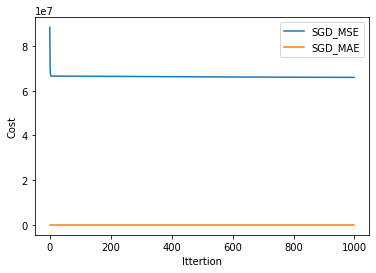

In [15]:
Regression.reset_parameters()
Mse_cost,Mse_theta = SGD_MSE(Regression)
Regression.reset_parameters()
Mae_cost,Mae_theta = SGD_MAE(Regression)
plot(Regression.iteration,Mse_cost,Mae_cost)

قسمت ب

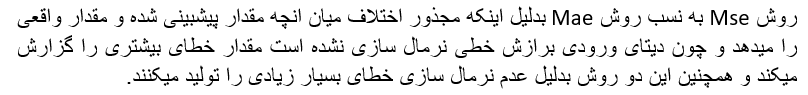

قسمت ج

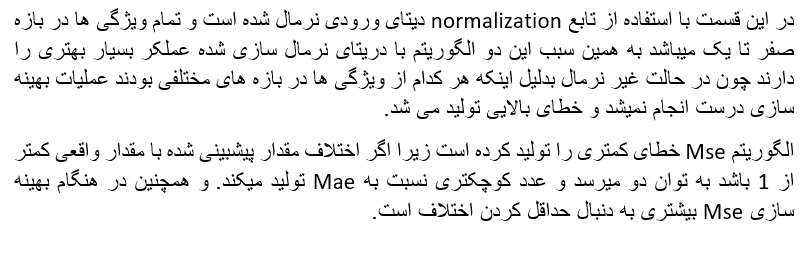




In [16]:
data = normalization(data)
x_train,y_train,x_test,y_test = split_data(data,ratio=0.8)

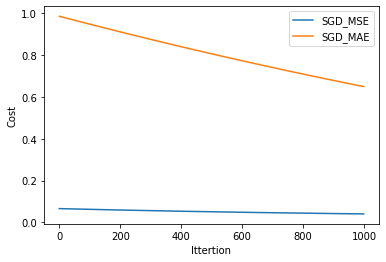

In [17]:
Regression.reset_parameters()
Mse_cost,Mse_theta = SGD_MSE(Regression)
Regression.reset_parameters()
Mae_cost,Mae_theta = SGD_MAE(Regression)
plot(Regression.iteration,Mse_cost,Mae_cost)

قسمت د


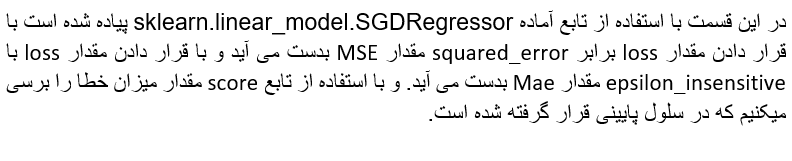

In [18]:
sgd_mse = sklearn.linear_model.SGDRegressor(loss='squared_error').fit(x_train,y_train)
sgd_mae = sklearn.linear_model.SGDRegressor(loss='epsilon_insensitive').fit(x_train,y_train)
print(f"Score using Mse is : {sgd_mse.score(x_test,y_test)}")
print(f"Score using Mae is : {sgd_mae.score(x_test,y_test)}")

Score using Mse is : 0.0759658438644566
Score using Mae is : 0.09194159501937715


متین **فاضل**

شماره دانشجویی : 9825583